In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("NetflixDataset.csv")

In [4]:
data.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
data.describe()

Show_Id Category              Title                Director  \
count     7789     7789               7789                    5401   
unique    7787        2               7787                    4050   
top      s6621    Movie  The Lost Okoroshi  Raúl Campos, Jan Suter   
freq         2     5379                  2                      18   

                      Cast        Country     Release_Date Rating  Duration  \
count                 7071           7282             7779   7782      7789   
unique                6831            681             1565     14       216   
top     David Attenborough  United States  January 1, 2020  TV-MA  1 Season   
freq                    18           2556              118   2865      1608   

                 Type                                        Description  
count            7789                                               7789  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [7]:
data.shape

(7789, 11)

In [8]:
data.isna().sum().sum()

3630

In [9]:
data.isna().sum() / data.shape[0]*100

Show_Id          0.000000
Category         0.000000
Title            0.000000
Director        30.658621
Cast             9.218128
Country          6.509180
Release_Date     0.128386
Rating           0.089870
Duration         0.000000
Type             0.000000
Description      0.000000
dtype: float64

In [10]:
data_prepared=data.dropna(axis=0, how="any")

In [11]:
data_prepared.shape

(4811, 11)

In [12]:
data_prepared.isna().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [13]:
data_prepared.describe()

Show_Id Category              Title                Director  \
count     4811     4811               4811                    4811   
unique    4809        2               4809                    3614   
top      s6621    Movie  The Lost Okoroshi  Raúl Campos, Jan Suter   
freq         2     4675                  2                      18   

               Cast        Country     Release_Date Rating Duration  \
count          4811           4811             4811   4811     4811   
unique         4689            544             1291     14      195   
top     Samuel West  United States  January 1, 2020  TV-MA   93 min   
freq             10           1655              100   1668      121   

                                Type  \
count                           4811   
unique                           324   
top     Dramas, International Movies   
freq                             306   

                                              Description  
count                                                4811  
unique                                               4804  
top     Secrets bubble to the surface after a sensual ...  
freq                                                    2

In [14]:
data_prepared["Country"].value_counts().shape

(544,)

In [15]:
data_prepared[(data_prepared["Country"] == "United States")].tail()

Show_Id Category                       Title         Director  \
7760   s7759    Movie  Zack and Miri Make a Porno      Kevin Smith   
7773   s7772    Movie                        Zion       Floyd Russ   
7776   s7775    Movie                      Zodiac    David Fincher   
7780   s7779    Movie                  Zombieland  Ruben Fleischer   
7783   s7782    Movie                        Zoom     Peter Hewitt   

                                                   Cast        Country  \
7760  Seth Rogen, Elizabeth Banks, Craig Robinson, J...  United States   
7773                                         Zion Clark  United States   
7776  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
7780  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
7783  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   

           Release_Date Rating Duration  \
7760    October 1, 2018      R  101 min   
7773    August 10, 2018  TV-PG   12 min   
7776  November 20, 2019      R  158 min   
7780   November 1, 2019      R   88 min   
7783   January 11, 2020     PG   88 min   

                                               Type  \
7760  Comedies, Independent Movies, Romantic Movies   
7773                   Documentaries, Sports Movies   
7776                 Cult Movies, Dramas, Thrillers   
7780                        Comedies, Horror Movies   
7783             Children & Family Movies, Comedies   

                                            Description  
7760  Zack and Miri make and star in an adult film t...  
7773  Born without legs and stuck in foster care for...  
7776  A political cartoonist, a crime reporter and a...  
7780  Looking to survive in a world taken over by zo...  
7783  Dragged from civilian life, a former superhero...

In [16]:
data.size

85679

In [17]:
data.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [18]:
data.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [19]:
data[data.duplicated()]

Show_Id Category              Title        Director  \
6300    s684    Movie           Backfire     Dave Patten   
6622   s6621    Movie  The Lost Okoroshi  Abba T. Makama   

                                                   Cast        Country  \
6300  Black Deniro, Byron "Squally" Vinson, Dominic ...  United States   
6622  Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...        Nigeria   

           Release_Date Rating Duration  \
6300      April 5, 2019  TV-MA   97 min   
6622  September 4, 2020  TV-MA   94 min   

                                       Type  \
6300  Dramas, Independent Movies, Thrillers   
6622   Comedies, Dramas, Independent Movies   

                                            Description  
6300  When two would-be robbers accidentally kill a ...  
6622  A disillusioned security guard transforms into...

In [20]:
data.drop_duplicates(inplace=True)

In [21]:
data[data.duplicated()]

Empty DataFrame
Columns: [Show_Id, Category, Title, Director, Cast, Country, Release_Date, Rating, Duration, Type, Description]
Index: []

In [22]:
data.shape

(7787, 11)

<AxesSubplot:>

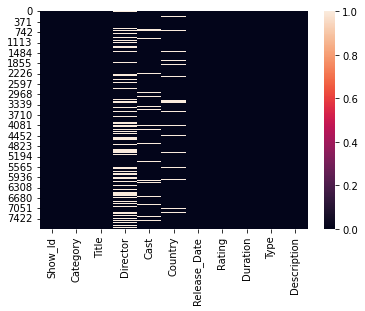

In [23]:
sns.heatmap(data.isnull())

In [24]:
data[data["Title"].isin(["Zombieland"])]

Show_Id Category       Title         Director  \
7780   s7779    Movie  Zombieland  Ruben Fleischer   

                                                   Cast        Country  \
7780  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   

          Release_Date Rating Duration                     Type  \
7780  November 1, 2019      R   88 min  Comedies, Horror Movies   

                                            Description  
7780  Looking to survive in a world taken over by zo...

In [25]:
data[data['Title'].isin(['House Of Cards'])]

Empty DataFrame
Columns: [Show_Id, Category, Title, Director, Cast, Country, Release_Date, Rating, Duration, Type, Description]
Index: []

In [26]:
data[data['Title'].str.contains('House of Cards')]

Show_Id Category           Title  \
2832   s2833  TV Show  House of Cards   

                                               Director  \
2832  Robin Wright, David Fincher, Gerald McRaney, J...   

                                                   Cast        Country  \
2832  Kevin Spacey, Robin Wright, Kate Mara, Corey S...  United States   

          Release_Date Rating   Duration                     Type  \
2832  November 2, 2018  TV-MA  6 Seasons  TV Dramas, TV Thrillers   

                                            Description  
2832  A ruthless politician will stop at nothing to ...

In [27]:
data.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [28]:
data['Date_N']=pd.to_datetime(data['Release_Date'])

In [29]:
data.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description     Date_N  
0  In a future where the elite inhabit an island ... 2020-08-14  
1  After a devastating earthquake hits Mexico Cit... 2016-12-23  
2  When an army recruit is found dead, his fellow... 2018-12-20  
3  In a postapocalyptic world, rag-doll robots hi... 2017-11-16  
4  A brilliant group of students become card-coun... 2020-01-01

In [30]:
data.dtypes

Show_Id                 object
Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date            object
Rating                  object
Duration                object
Type                    object
Description             object
Date_N          datetime64[ns]
dtype: object

In [31]:
data["Date_N"].dt.year.value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: Date_N, dtype: int64

<AxesSubplot:>

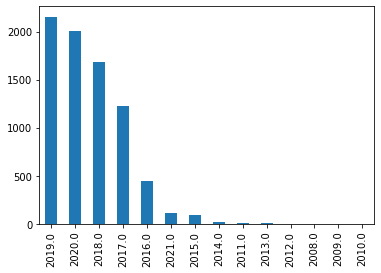

In [32]:
data["Date_N"].dt.year.value_counts().plot(kind="bar")

In [33]:
data.groupby("Category").Category.count()

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

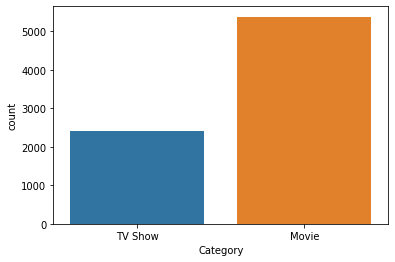

In [34]:
sns.countplot(data["Category"])

In [35]:
data["Director"].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

In [36]:
 data[data["Cast"] == "Steven Spielberg"]

Empty DataFrame
Columns: [Show_Id, Category, Title, Director, Cast, Country, Release_Date, Rating, Duration, Type, Description, Date_N]
Index: []

In [37]:
data[["Minutes","Unit"]] = data["Duration"].str.split(' ',expand=True)

In [38]:
data.head(2)

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   

                                                Cast Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   

                                         Description     Date_N Minutes  \
0  In a future where the elite inhabit an island ... 2020-08-14       4   
1  After a devastating earthquake hits Mexico Cit... 2016-12-23      93   

      Unit  
0  Seasons  
1      min

In [39]:
data["Minutes"].max()

'99'

In [40]:
data_tvshow=data[data["Category"]== "TV Show"]

In [41]:
data_tvshow.head(2)

Show_Id Category Title     Director  \
0      s1  TV Show    3%          NaN   
5      s6  TV Show    46  Serdar Akar   

                                                Cast Country     Release_Date  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil  August 14, 2020   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...  Turkey     July 1, 2017   

  Rating   Duration                                               Type  \
0  TV-MA  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
5  TV-MA   1 Season    International TV Shows, TV Dramas, TV Mysteries   

                                         Description     Date_N Minutes  \
0  In a future where the elite inhabit an island ... 2020-08-14       4   
5  A genetics professor experiments with a treatm... 2017-07-01       1   

      Unit  
0  Seasons  
5   Season

In [42]:
data_tvshow.Country.value_counts()

United States                                                705
United Kingdom                                               204
Japan                                                        157
South Korea                                                  147
India                                                         71
                                                            ... 
Canada, United States, United Kingdom, France, Luxembourg      1
United States, Italy                                           1
Chile, Italy                                                   1
Canada, United Kingdom                                         1
United States, France, South Korea, Indonesia                  1
Name: Country, Length: 183, dtype: int64

In [43]:
data_tvshow.Country.value_counts().head(1)

United States    705
Name: Country, dtype: int64

In [48]:
unit=data.sort_values(by = 'Unit' , ascending = True).head(10)

In [45]:
data[(data["Category"]=="Movie") & (data["Type"]=="Dramas")].head(1)

Show_Id Category Title        Director  \
4      s5    Movie    21  Robert Luketic   

                                                Cast        Country  \
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

      Release_Date Rating Duration    Type  \
4  January 1, 2020  PG-13  123 min  Dramas   

                                         Description     Date_N Minutes Unit  
4  A brilliant group of students become card-coun... 2020-01-01     123  min